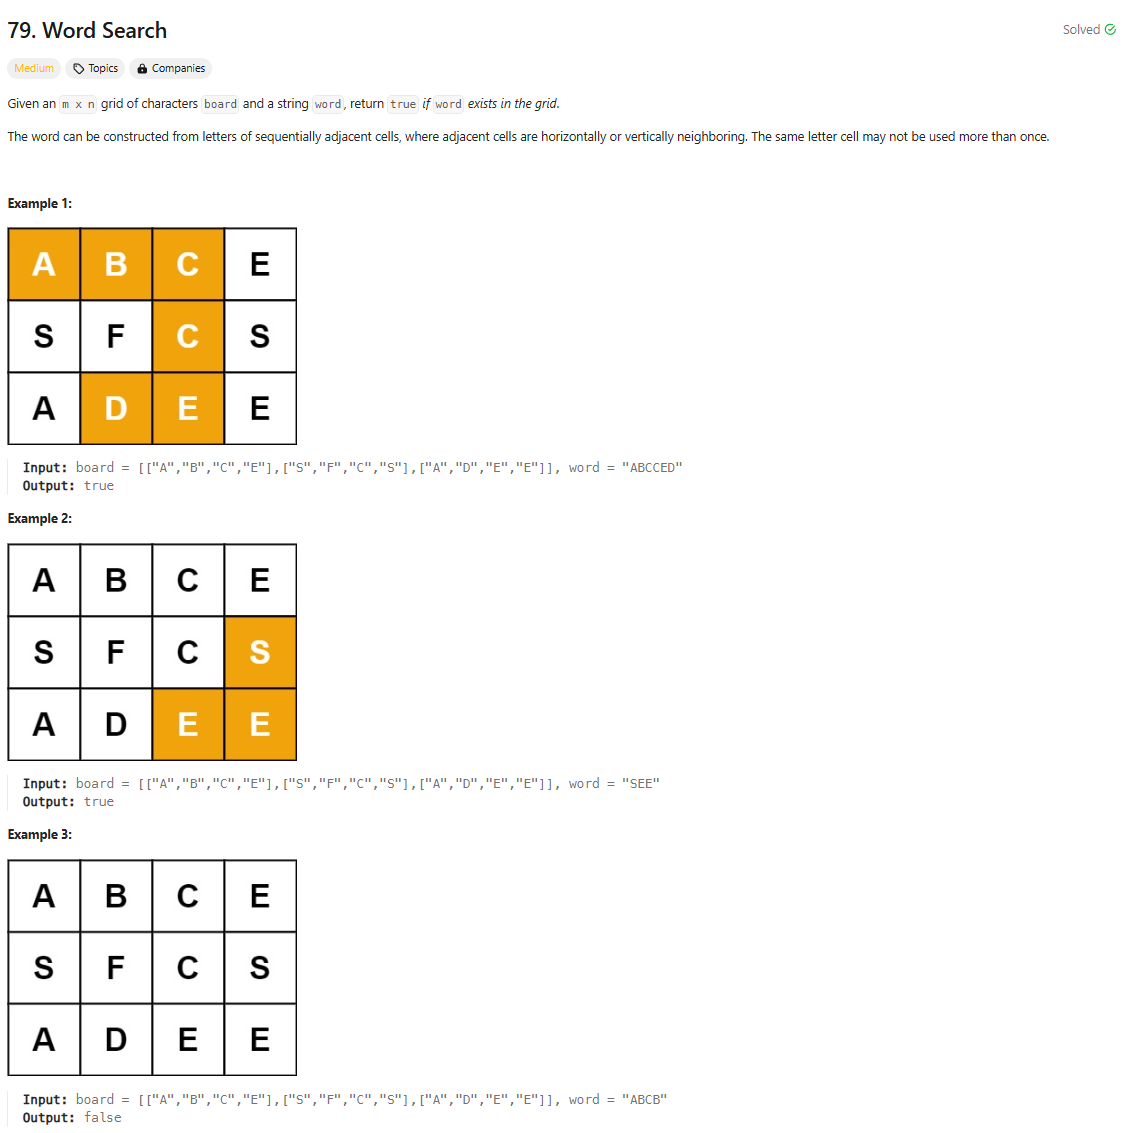

In [ ]:
# Solution 1 (Backtracking)
# Time : O(C 4^W). Where C is the number of cells and W is the length of the word.
# Memory : O(W) 

class Solution:
    def exist(self, board: List[List[str]], word: str) -> bool:
        m, n = len(board), len(board[0])

        def inside(i, j):
            nonlocal m, n
            return ((0 <= i < m) and (0 <= j < n))

        def dfs(i, j, word, seen):
            if not word:
                return True
            
            if not inside(i, j) or (i, j) in seen or board[i][j] != word[0]:
                return False
            
            new_word = word[1:]
            seen.add((i, j))
            res = dfs(i+1, j, new_word, seen) or dfs(i-1, j, new_word, seen) or dfs(i, j+1, new_word, seen) or dfs(i, j-1, new_word, seen)
            seen.remove((i, j))
            return res

        for i in range(m):
            for j in range(n):
                if dfs(i, j, word, set()):
                    return True
        
        return False

In [ ]:
# Solution 2 (Backtracking with more bells and whistles)
# Time : O(C 4^W). Where C is the number of cells and W is the length of the word.
# Memory : O(W) 

class Solution:
    def exist(self, board: List[List[str]], word: str) -> bool:
        m, n = len(board), len(board[0])
        board_fr = Counter(c for row in board for c in row)
        word_fr = Counter(word)

        for c, f in word_fr.items():
            if board_fr[c] < f:
                return False
        
        if board_fr[word[0]] > board_fr[word[-1]]:
            word = word[::-1]

        def inside(i, j):
            nonlocal m, n
            return ((0 <= i < m) and (0 <= j < n))

        def dfs(i, j, word):
            if not word:
                return True
            
            if not inside(i, j) or board[i][j] != word[0]:
                return False
            
            new_word = word[1:]
            board[i][j] = '#'
            res = dfs(i+1, j, new_word) or dfs(i-1, j, new_word) or dfs(i, j+1, new_word) or dfs(i, j-1, new_word)
            board[i][j] = word[0]
            return res

        for i in range(m):
            for j in range(n):
                if dfs(i, j, word):
                    return True
        
        return False